Attempt at finding clusters in the events of GENIE16_CH datasets

In [ ]:
import mhn
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns

import mhn_tools as mytools
import checkpoints_mbonart as cp
import EventDistanceMeasurer as edm

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(999)
file_names=["G16_CH_BLCA_Events.csv", "G16_CH_COAD_Events.csv", "G16_CH_LUAD_Events.csv", "G16_CH_MEL_Events.csv", "G16_CH_PRAD_Events.csv"]
file_path=os.path.join( os.getcwd(), '..','data', file_names[2] )
input = pd.read_csv(file_path)
events=list(input.columns)[1:]
print(events)


['TP53 (M)', 'MCL1/1q (Amp)', 'TERT/5p (Amp)', 'KRAS (M)', 'CDKN2A/9p (Del)', 'MYC/8q (Amp)', 'EGFR/7p (Amp)', 'EGFR (M)', 'EPHA7/6q (Del)', 'BCL2/18q (Del)', 'RB1/13q (Del)', 'STK11 (M)', 'RBM10 (M)', 'KEAP1 (M)', 'SMARCA4 (M)', 'NF1 (M)', 'ATM (M)', 'PIK3CA (M)', 'BRAF (M)', 'ARID1A (M)', 'FAT1 (M)', 'SETD2 (M)', 'MET (M)', 'RB1 (M)', 'ERBB2 (M)', 'SMAD4 (M)', 'KMT2D (M)', 'ARID2 (M)', 'APC (M)', 'ATRX (M)', 'CH']


In [ ]:
cp.FORCE_EXECUTE_COMPUTATIONS=True
n_test_events=3
dist_measurer = edm.EventDistanceMeasurerCP(events[0:n_test_events],events[n_test_events:])
dist_measurer.load_data(input)
dist_measurer.train_All_MHNs(do_cv=False)
dist_measurer.compute_distance_matrix(edm.DIST.OFFDIAG_L1_SYM)

0x1.50acc87c6c830p+62
Directory for storage is edm_50acc87c6c830
training MHN for event KRAS (M)
training MHN for event CDKN2A/9p (Del)
training MHN for event MYC/8q (Amp)
training MHN for event EGFR/7p (Amp)
training MHN for event EGFR (M)
training MHN for event EPHA7/6q (Del)
training MHN for event BCL2/18q (Del)
training MHN for event RB1/13q (Del)
training MHN for event STK11 (M)
training MHN for event RBM10 (M)
training MHN for event KEAP1 (M)
training MHN for event SMARCA4 (M)
training MHN for event NF1 (M)
training MHN for event ATM (M)
training MHN for event PIK3CA (M)
training MHN for event BRAF (M)
training MHN for event ARID1A (M)
training MHN for event FAT1 (M)
training MHN for event SETD2 (M)
training MHN for event MET (M)
training MHN for event RB1 (M)
training MHN for event ERBB2 (M)
training MHN for event SMAD4 (M)
training MHN for event KMT2D (M)
training MHN for event ARID2 (M)
training MHN for event APC (M)
training MHN for event ATRX (M)
training MHN for event CH


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


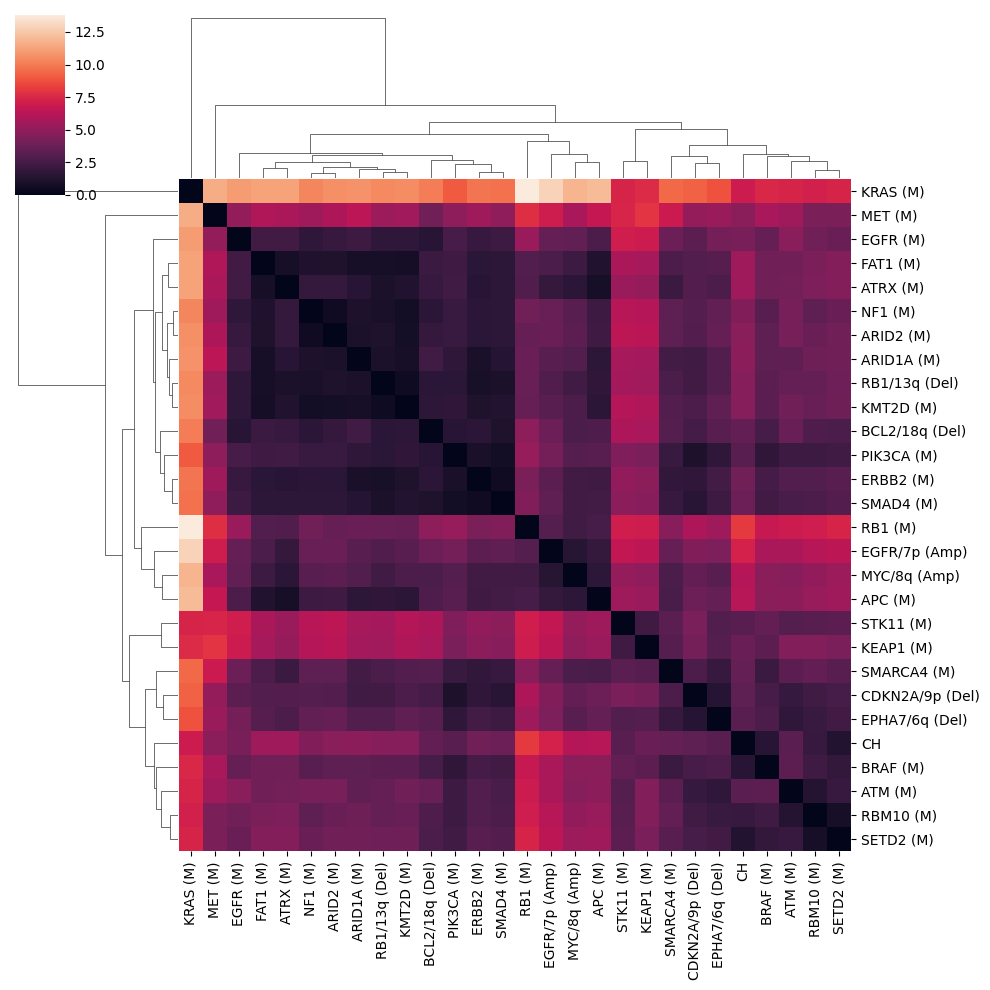

In [9]:
sns.clustermap(dist_measurer._dist_mat)


Here we use the same algorithm but with 4 test events (the 3 from before and KRAS)

In [ ]:

distance_mat2=mytools.getDistMatrix(input, n_test_events=4)
sns.clustermap(distance_mat2)

AttributeError: module 'mhn_tools' has no attribute 'getDistMatrix'

[[ 0.3  -2.95 -2.64  0.  ]
 [ 0.18 -0.65 -0.1   0.  ]
 [ 0.56 -0.18 -0.8   0.  ]
 [ 0.    0.    0.    0.  ]]


(<matplotlib.image.AxesImage at 0x1644a6709b0>,
 <matplotlib.colorbar.Colorbar at 0x1644a1b98e0>)

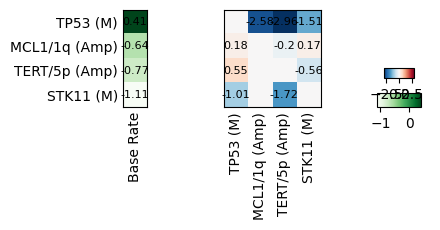

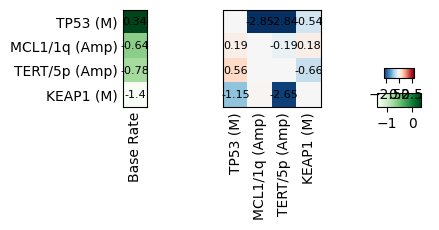

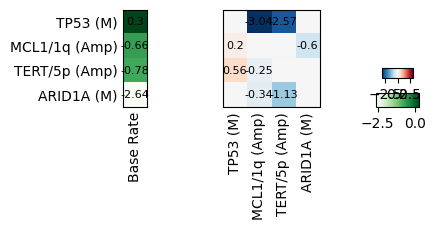

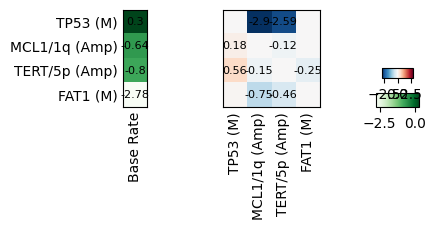

In [12]:
print(dist_measurer._init_theta)

#dist_measurer._mhns['RB1 (M)'].plot()
#dist_measurer._mhns['ERBB2 (M)'].plot()


dist_measurer._mhns['STK11 (M)'].plot()
dist_measurer._mhns['KEAP1 (M)'].plot()

dist_measurer._mhns['ARID1A (M)'].plot()
dist_measurer._mhns['FAT1 (M)'].plot()

0.00038684719535783365
0.00038684719535783365


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\model.py:570: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(


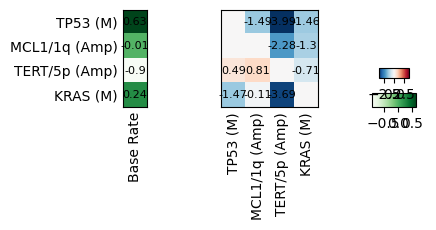

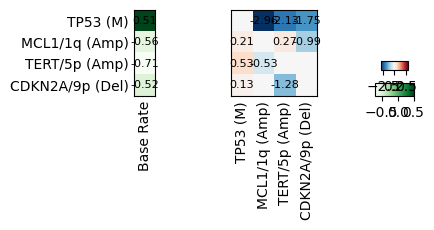

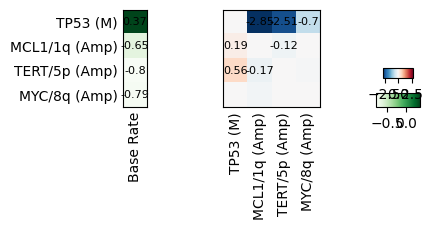

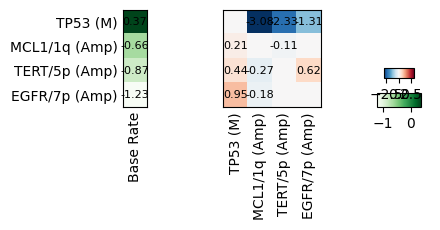

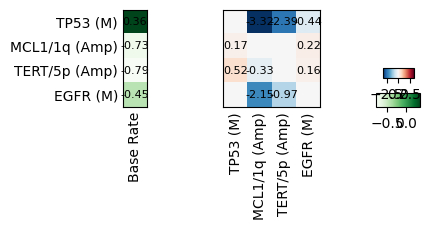

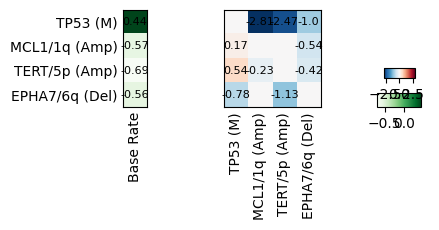

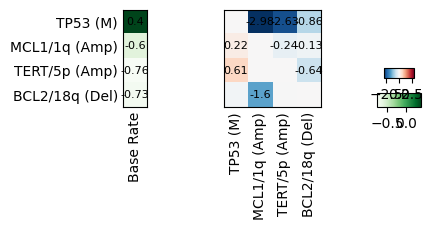

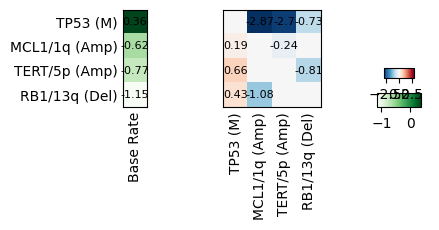

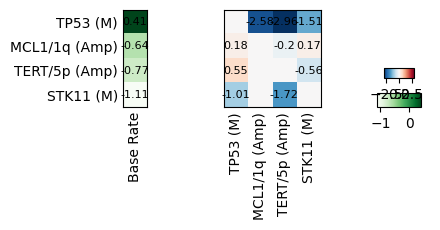

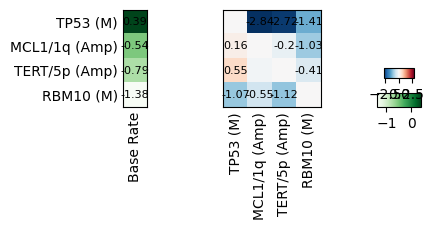

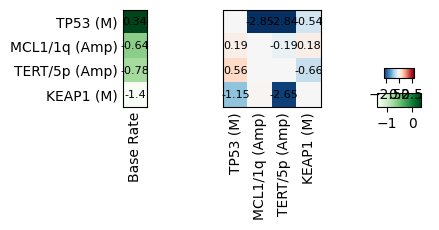

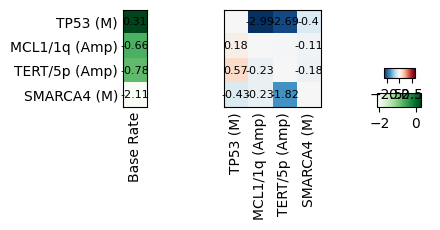

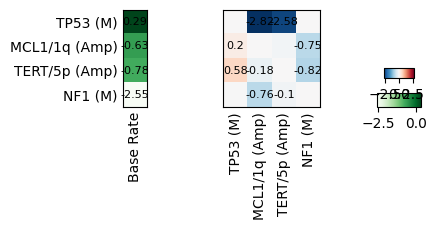

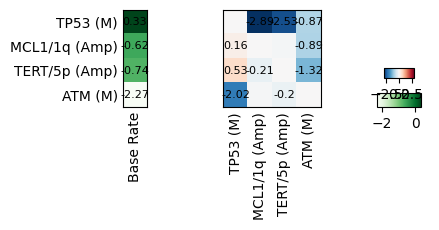

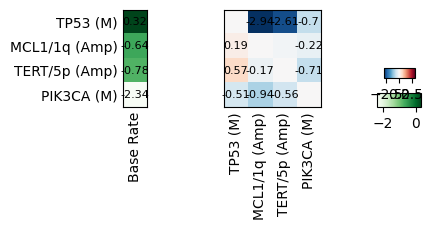

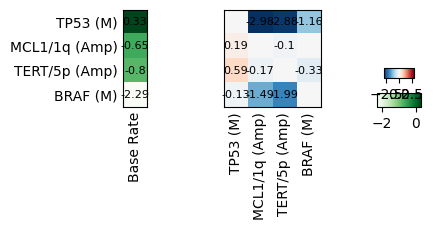

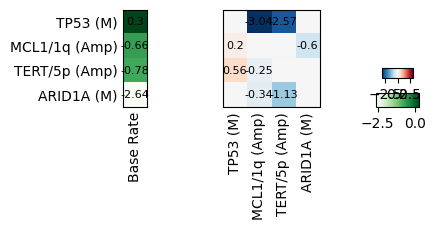

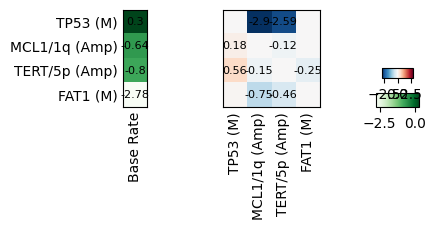

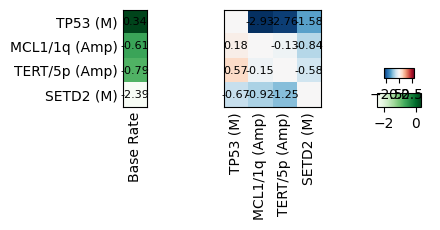

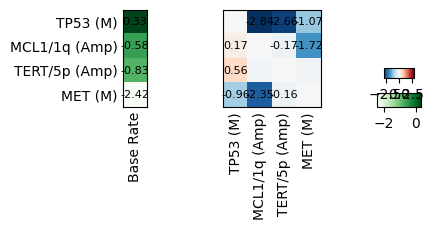

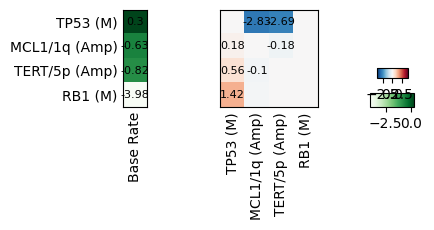

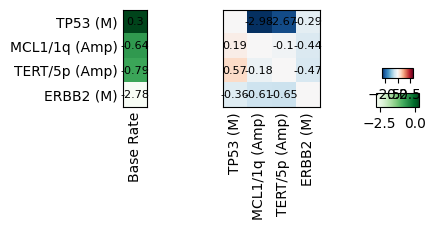

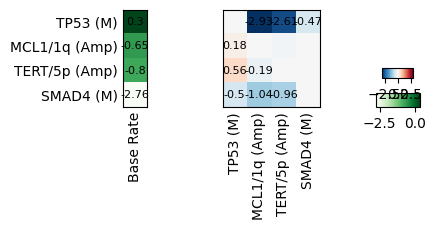

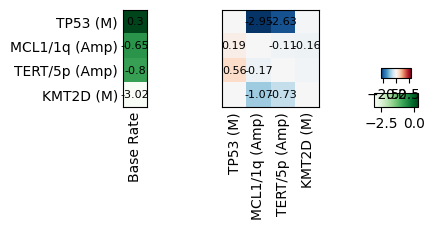

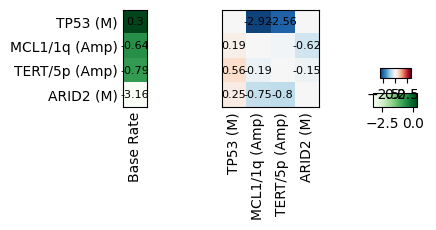

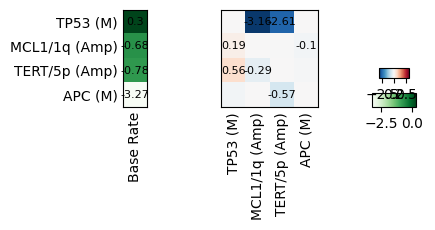

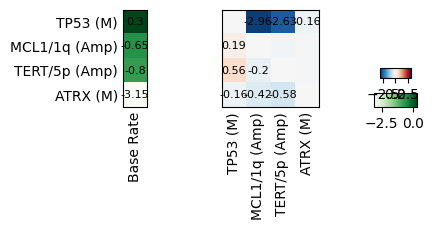

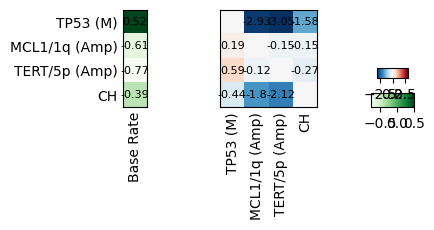

In [7]:
print(dist_measurer._lam_test)
print(1/len(input))

for ev in dist_measurer._events:
    dist_measurer._mhns[ev].plot()